### Reused code from:
https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Interaction%20Network.ipynb

Warning: It takes quite long to process large newtorks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
from operator import itemgetter

%matplotlib inline

In [2]:
path = './twitter_data'
trend = '???'

In [ ]:
nodes_df = pd.read_csv(f'{path}/{trend}_node_list.csv')
nodes_df.info()

In [ ]:
edges_df = pd.read_csv(f'{path}/{trend}_edge_data.csv')
edges_df.info()

In [5]:
graph = nx.Graph()

In [6]:
graph.add_nodes_from(nodes_for_adding=nodes_df['name'], size=nodes_df['size'])

In [7]:
for i, edge in enumerate(edges_df['edge']):
    u, v = edge.strip().split(',')
    u = u.strip(" ()'")
    v = v.strip(" ()'")
    graph.add_edge(u, v, weight=edges_df['weight'][i])

In [8]:
print(f"There are {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges present in the graph")

degrees = [val for (node, val) in graph.degree()]
print(f"The maximum degree of the graph is {np.max(degrees)}")   
print(f"The minimum degree of the graph is {np.min(degrees)}")
print(f"The average degree of the nodes in the graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the graph is {stats.mode(degrees)[0][0]}")

There are 607 nodes and 615 edges present in the graph
The maximum degree of the graph is 356
The minimum degree of the graph is 1
The average degree of the nodes in the graph is 2.0
The most frequent degree of the nodes found in the graph is 1


In [9]:
if nx.is_connected(graph):
    print("The graph is connected")
else:
    print("The graph is NOT connected")
print(f"There are {nx.number_connected_components(graph)} connected components in the graph")  

largest_subgraph = max(nx.connected_component_subgraphs(graph), key=len)
print(f"There are {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} \
edges present in the largest component of the graph")

if nx.is_connected(largest_subgraph):
    print("The largest graph is connected")
else:
    print("The largest graph is not connected")

The graph is connected
There are 1 connected components in the graph
There are 607 nodes and 615 edges present in the largest component of the graph
The largest graph is connected


In [ ]:
print(f"The average clustering coefficient is {nx.average_clustering(largest_subgraph)} in the largest subgraph")
print(f"The transitivity of the largest subgraph is {nx.transitivity(largest_subgraph)}")

In [11]:
print(f"The diameter of the graph is {nx.diameter(largest_subgraph)}")
print(f"The average distance between any two nodes is {nx.average_shortest_path_length(largest_subgraph):.2f}")

The diameter of the graph is 4
The average distance between any two nodes is 2.94


In [ ]:
graph_centrality = nx.degree_centrality(largest_subgraph)
max_de = max(graph_centrality.items(), key=itemgetter(1))
graph_closeness = nx.closeness_centrality(largest_subgraph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))
graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the graph")
print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]:.2f} which is the maximum of the graph")

In [15]:
node_and_degree = largest_subgraph.degree()
central_nodes = [max_de[0], max_clo[0], max_bet[0]]
colors_central_nodes = ['red', 'orange', 'yellow']
pos = nx.spring_layout(largest_subgraph, k=0.05)

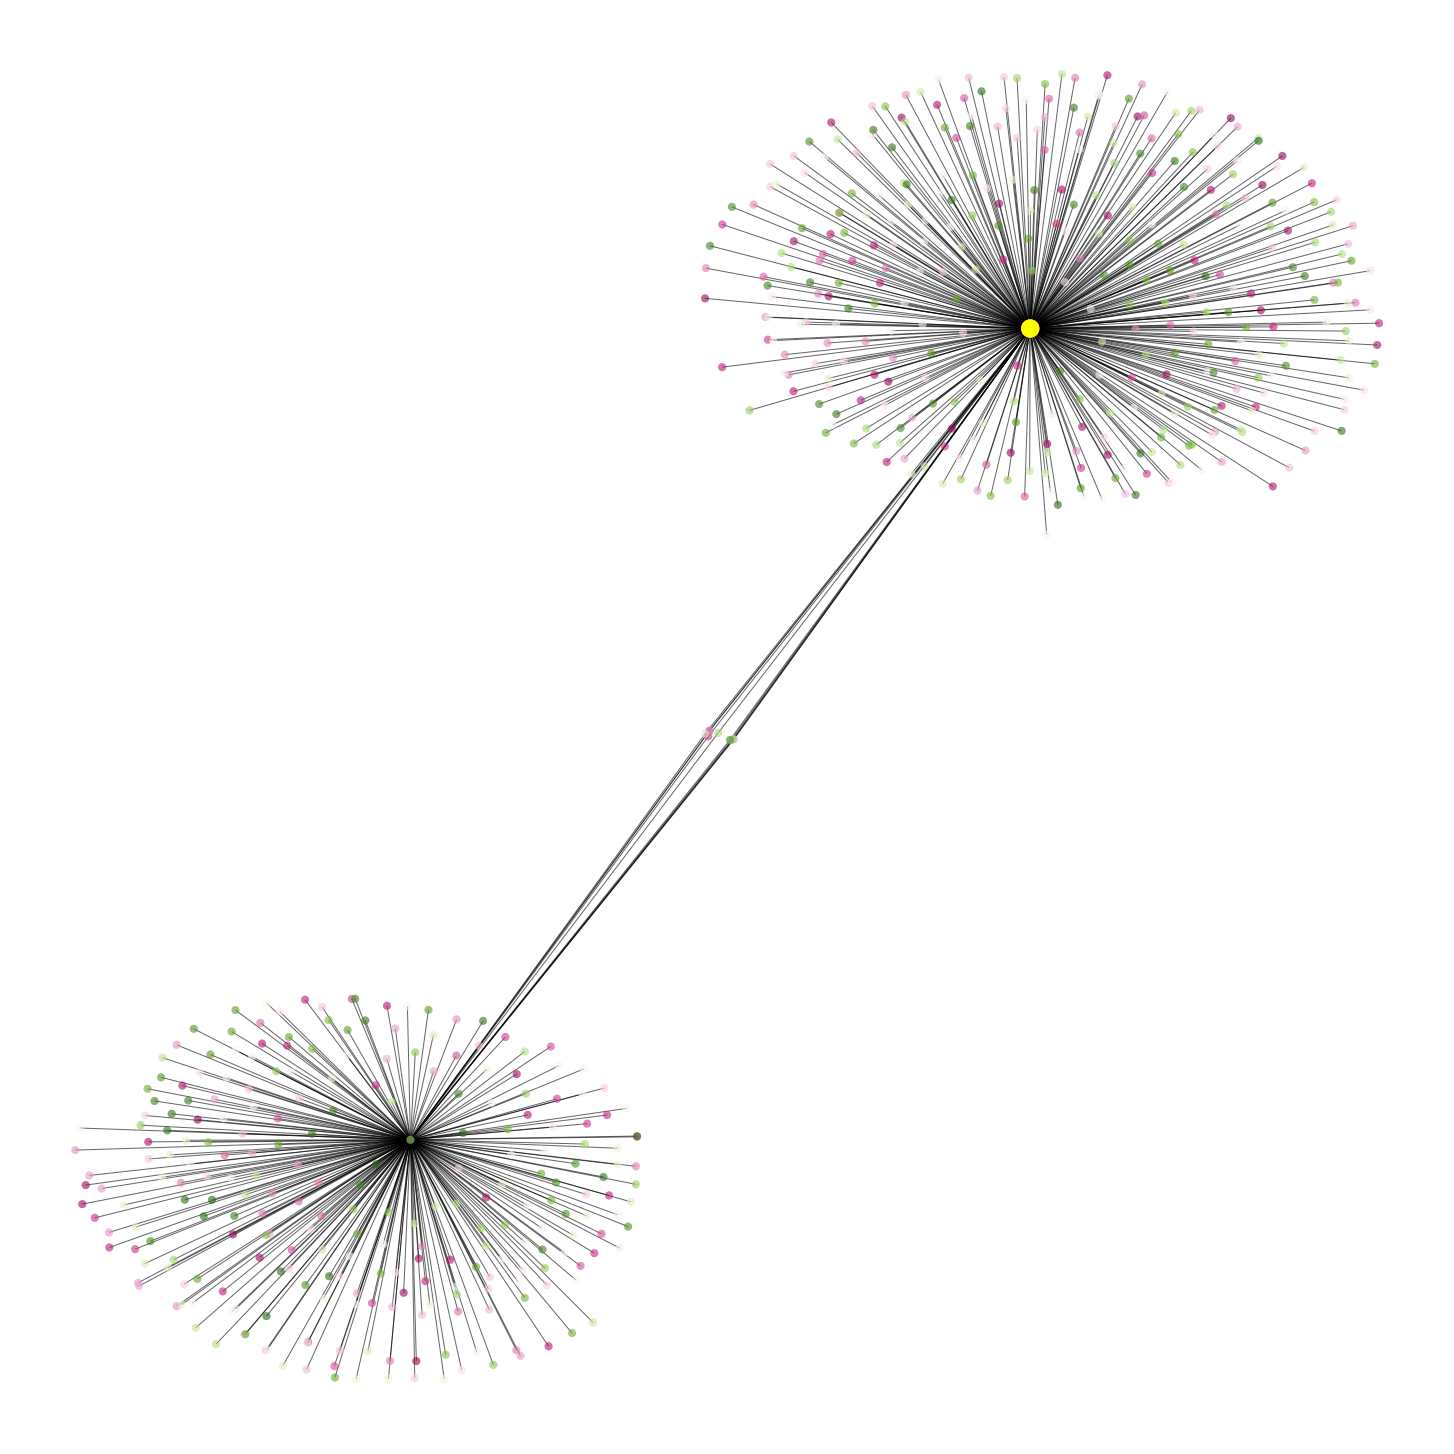

In [18]:
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(largest_subgraph.number_of_nodes()), cmap=plt.cm.PiYG, 
        edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central_nodes, node_size=300, 
                       node_color=colors_central_nodes, with_labels=True)
plt.savefig(f'{trend}_social_graph.png')
plt.show()